In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [38]:
# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [3]:
data = load_diabetes()

X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data = pd.pd.Series(data.target, name='target')

df_X = data.data
df_y = data.target
X = np.array(df_X)
y = np.array(df_y)
print(f'X: {type(X)}, {X.dtype}')
print(f'y: {type(y)}, {y.dtype}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X: <class 'numpy.ndarray'>, float64
y: <class 'numpy.ndarray'>, float64
X_train: (353, 10), y_train: (353,)
X_test: (89, 10), y_test: (89,)


In [35]:
X_data = pd.DataFrame(data.data, columns=data.feature_names)
X_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [36]:
y_data = pd.Series(data.target, name='target')
y_data.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [4]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
print(f'W: {len(W)}')
print('b: 1')

W: 10
b: 1


In [5]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [7]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = (1/N) * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [9]:
LEARNING_RATE = 0.001

In [10]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 21799.4580
Iteration 200 : Loss 16597.4430
Iteration 300 : Loss 13109.2523
Iteration 400 : Loss 10769.4142
Iteration 500 : Loss 9199.0355
Iteration 600 : Loss 8144.2397
Iteration 700 : Loss 7434.9172
Iteration 800 : Loss 6957.0864
Iteration 900 : Loss 6634.3743
Iteration 1000 : Loss 6415.6072


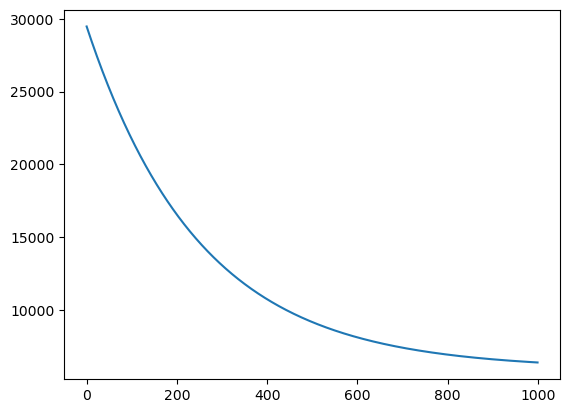

In [11]:
plt.plot(losses)
plt.show()

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(f'mse: {mse}')

mse: 5382.691678062846


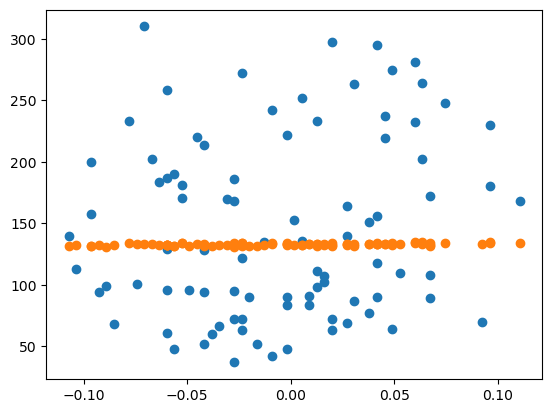

In [13]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [14]:
LEARNING_RATE = 0.1

In [15]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5323.9531
Iteration 200 : Loss 4836.0631
Iteration 300 : Loss 4472.8394
Iteration 400 : Loss 4198.7910
Iteration 500 : Loss 3988.9450
Iteration 600 : Loss 3825.6847
Iteration 700 : Loss 3696.5445
Iteration 800 : Loss 3592.6683
Iteration 900 : Loss 3507.7342
Iteration 1000 : Loss 3437.2020


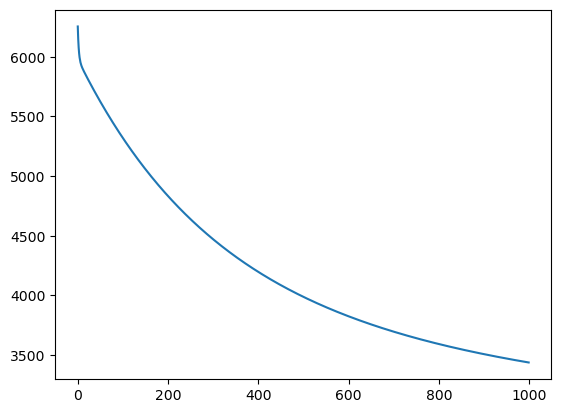

In [16]:
plt.plot(losses)
plt.show()

In [17]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(f'mse: {mse}')

mse: 3086.6854302682495


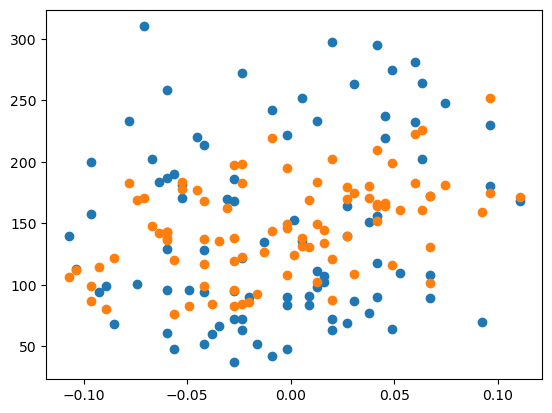

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [20]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3377.7874
Iteration 200 : Loss 3327.0940
Iteration 300 : Loss 3283.3554
Iteration 400 : Loss 3245.2539
Iteration 500 : Loss 3211.7936
Iteration 600 : Loss 3182.2108
Iteration 700 : Loss 3155.9108
Iteration 800 : Loss 3132.4224
Iteration 900 : Loss 3111.3671
Iteration 1000 : Loss 3092.4353
Iteration 1100 : Loss 3075.3702
Iteration 1200 : Loss 3059.9561
Iteration 1300 : Loss 3046.0092
Iteration 1400 : Loss 3033.3716
Iteration 1500 : Loss 3021.9062
Iteration 1600 : Loss 3011.4931
Iteration 1700 : Loss 3002.0266
Iteration 1800 : Loss 2993.4134
Iteration 1900 : Loss 2985.5703
Iteration 2000 : Loss 2978.4234
Iteration 2100 : Loss 2971.9063
Iteration 2200 : Loss 2965.9597
Iteration 2300 : Loss 2960.5302
Iteration 2400 : Loss 2955.5698
Iteration 2500 : Loss 2951.0351
Iteration 2600 : Loss 2946.8873
Iteration 2700 : Loss 2943.0909
Iteration 2800 : Loss 2939.6142
Iteration 2900 : Loss 2936.4283
Iteration 3000 : Loss 2933.5073
Iteration 3100 : Loss 2930.8274
Iteration 3200 : 

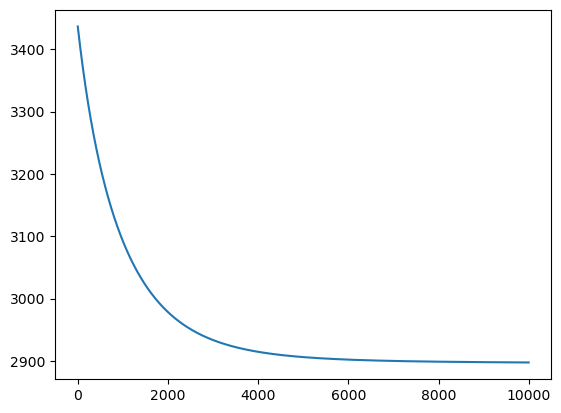

In [21]:
plt.plot(losses)
plt.show()

In [22]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(f'mse: {mse}')

mse: 2881.4177218695654


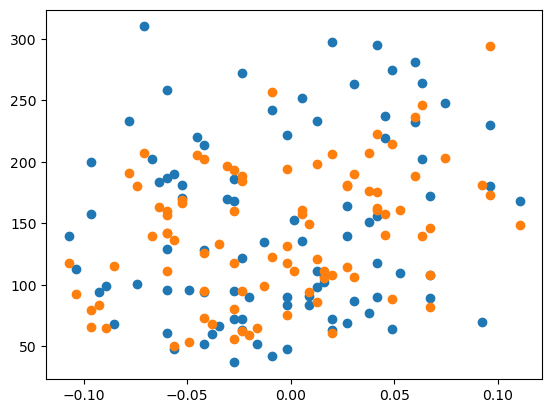

In [23]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [37]:
# review
# 사이킷런에서 제공하는 당뇨병 데이터셋을 활용하여, MSE를 손실 함수로 사용하는 선형 회귀 모델을 구현하고, 
# 경사 하강법 기반으로 학습을 진행하였다.
# 당뇨병 데이터셋은 총 452개의 샘플과 10개의 피처(age, sex, bmi, bp, s1, s2, s3, s4, s5 그리고 s6)로 구성되어 있다.
# 이 데이터를 학습용 353개, 평가용 89개로 8:2 비율로 나누어 학습과 평가를 진행하였다.
# 학습률을 0.001로 설정했을 때, 손실값이 매우 천천히 감소하며 수렴 속도가 느렸고, 
# 학습 데이터에 대한 최종 MSE는 약 6416으로 비교적 높은 편이었다. 
# 테스트 데이터에 대한 예측 결과 역시 MSE가 약 5384로 높게 나타나, 
# 이는 모델이 충분히 학습되지 못한 과소적합 상태로 해석할 수 있다.
# 학습률을 0.1로 조정하자 손실값이 훨씬 빠르게 감소하면서 학습 속도가 크게 향상되었고, 
# 학습 데이터 기준 MSE는 약 3437까지 줄어들었다. 
# 테스트 데이터에 대해서도 MSE가 약 3087로 감소해, 
# 학습률 조정만으로도 모델 성능이 크게 개선될 수 있음을 보여준다.
# 학습률을 0.1로 유지한 상태에서 반복 횟수를 1000에서 10000으로 늘리자, 
# 학습 데이터 기준 MSE는 약 2897까지 추가로 감소하였다. 
# 테스트 데이터의 MSE 역시 약 2881로 줄어들며, 
# 이는 충분한 반복 학습을 통해 모델이 더욱 최적화될 수 있음을 의미한다.

In [26]:
# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [39]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [40]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

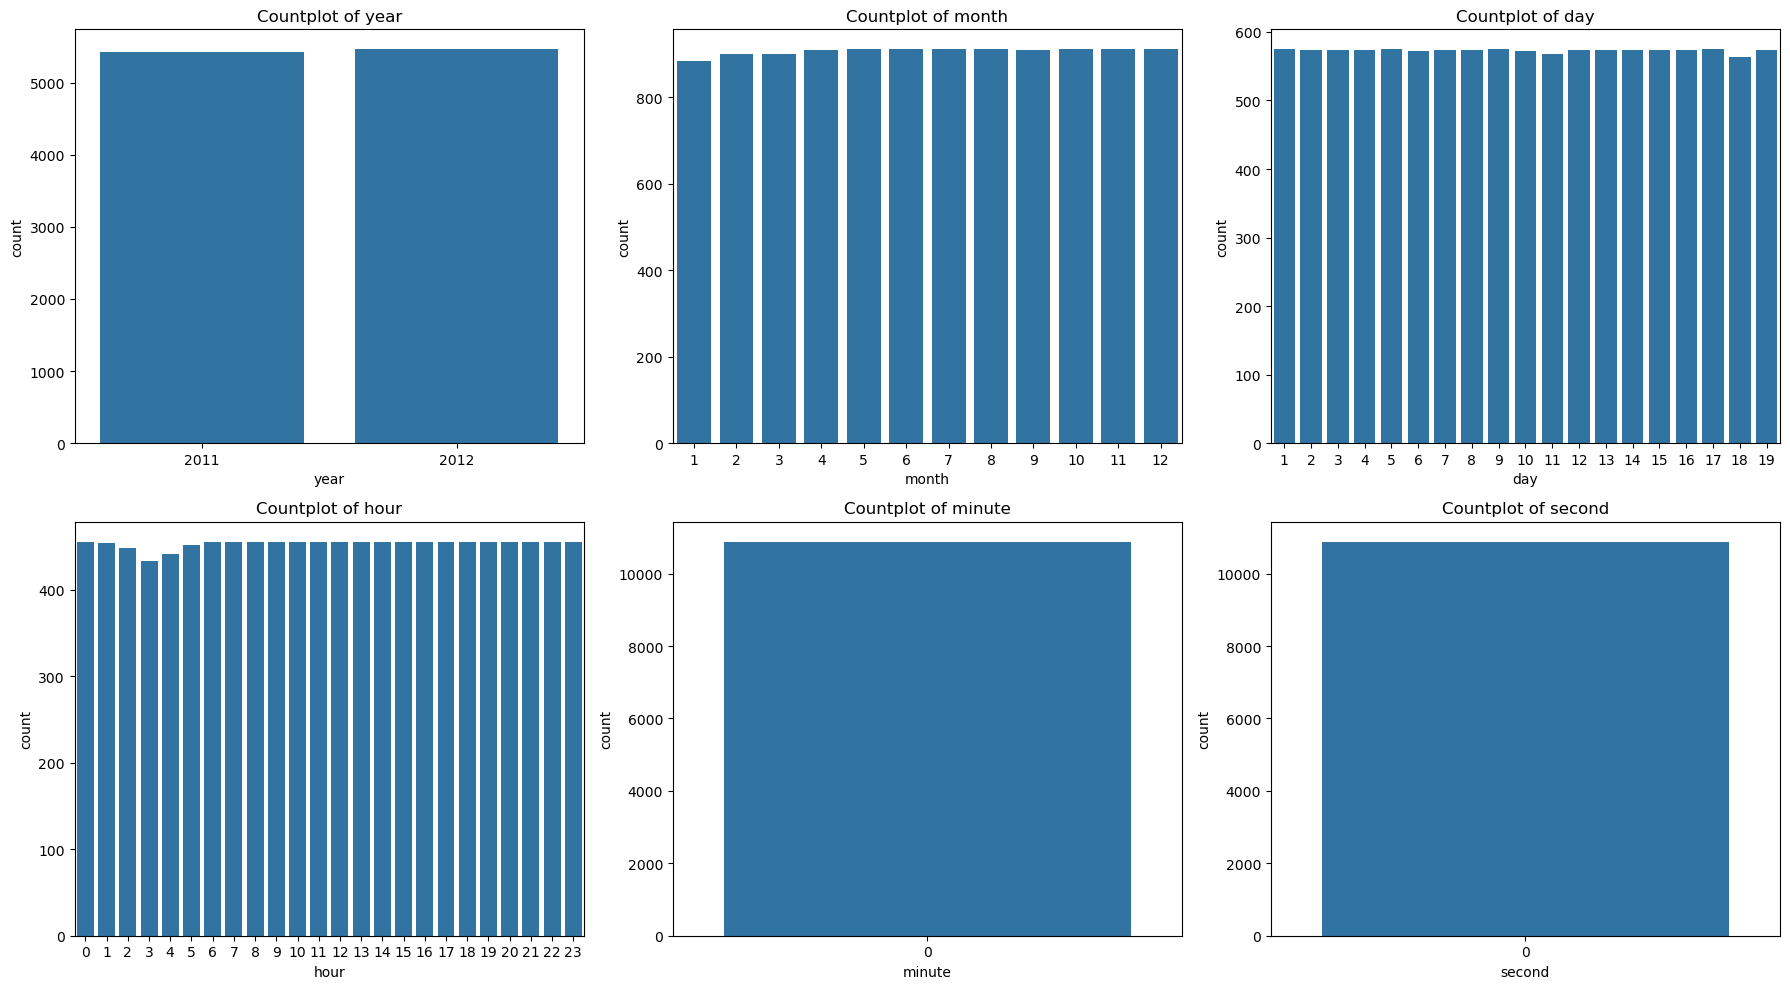

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [44]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (8708, 7), y_train: (8708,)
X_test: (2178, 7), y_test: (2178,)


In [48]:
X.head()

,year,month,day,hour,temp,humidity,windspeed
0,2011,1,1,0,9.84,81,0.0
1,2011,1,1,1,9.02,80,0.0
2,2011,1,1,2,9.02,80,0.0
3,2011,1,1,3,9.84,75,0.0
4,2011,1,1,4,9.84,75,0.0


In [50]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 19961.901814435438
rmse: 141.2865946027274


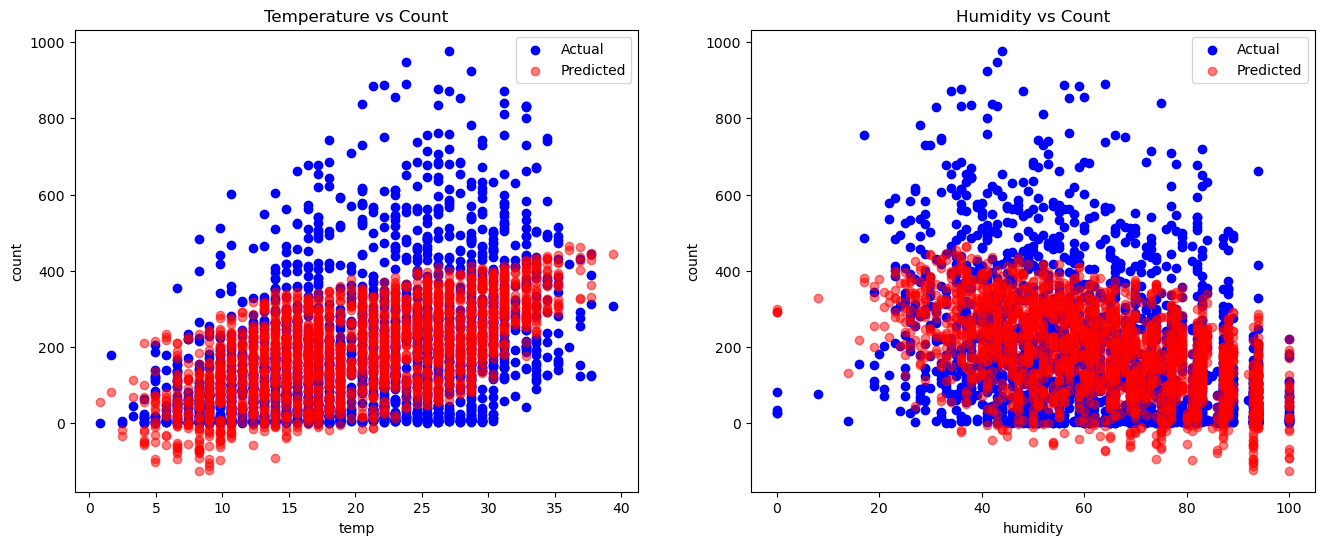

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count visualization
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count visualization
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [62]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [63]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 19969.06194775546
rmse: 141.31193137083457


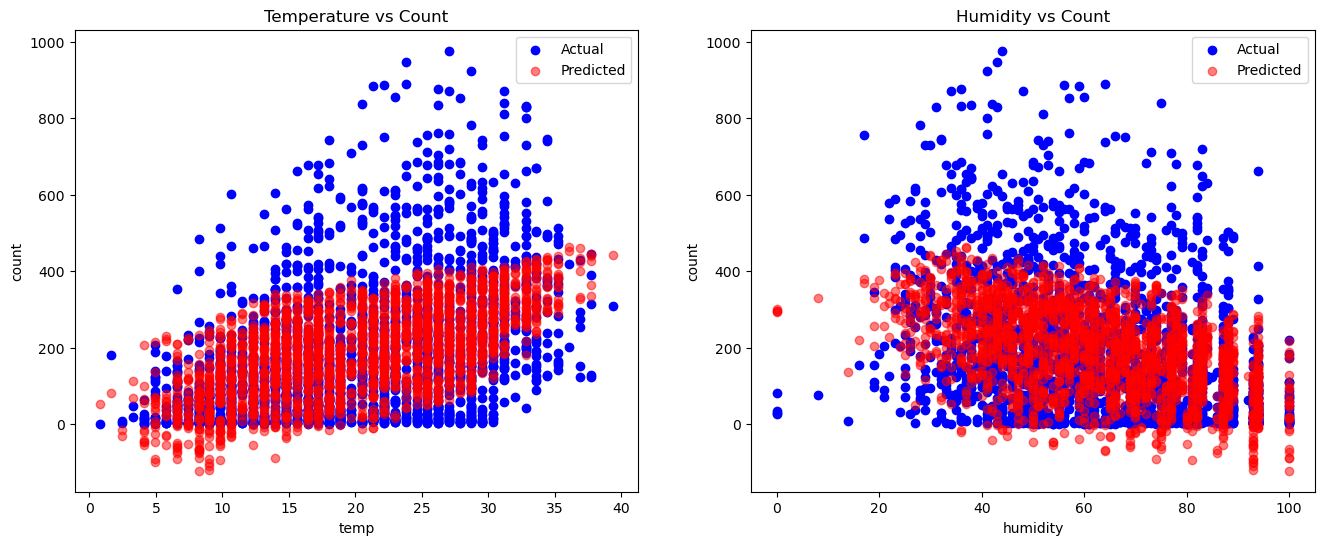

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count visualization
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count visualization
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [74]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [75]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 19961.915154520022
rmse: 141.28664181202703


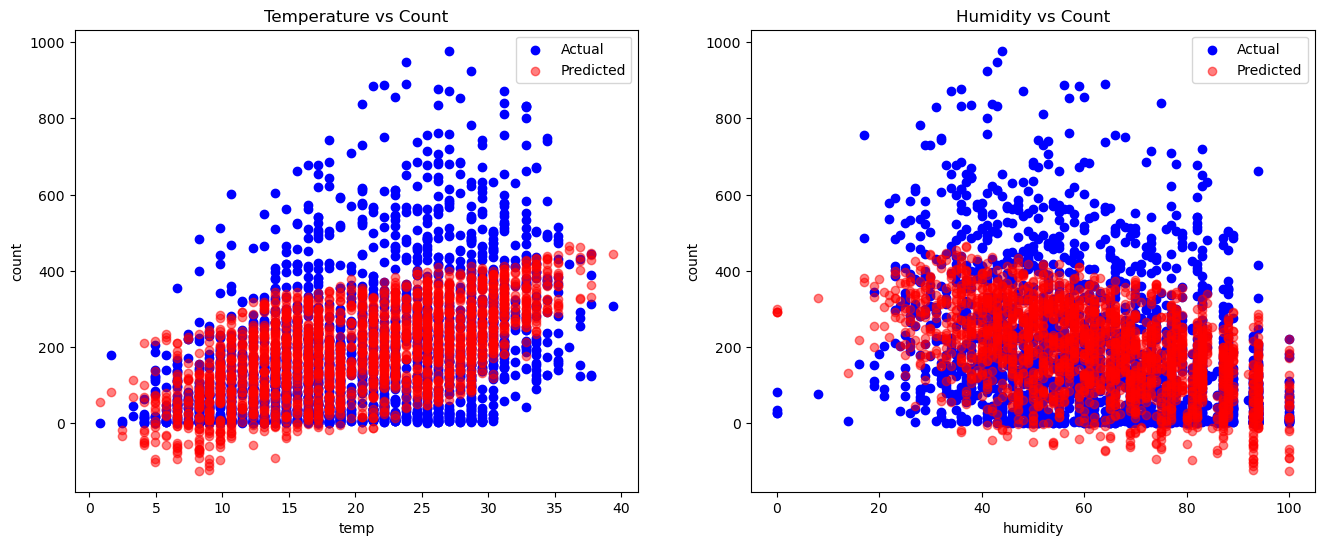

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count visualization
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count visualization
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [77]:
# 캐글에서 제공하는 자전거 대여 수요 예측 데이터를 활용하여, 
# 사이킷런의 선형 회귀 모델을 기반으로 학습 및 예측을 수행하였다.
# 초기 데이터는 datetime, season, holiday, workingday, weather, temp, atemp, humidity, 
# windspeed, casual, registered 그리고 count의 총 12개 피처로 구성되어 있었으며, 
# 이 중 datetime은 datetime64[ns] 타입으로 변환한 뒤 year, month, day, 
# hour, minute, second로 분해하여 추가적인 datetime 기반의 피처를 생성하였다.
# 학습에는 year, month, day, hour, temp, humidity 그리고 windspeed 총 7개 피처를 선택하였고, 
# 이를 기반으로 학습용 데이터 8,708개와 테스트용 데이터 2,178개로 8:2 비율로 분할하여 모델 학습 및 평가를 수행하였다.
# 모델 성능 평가는 MSE와 RMSE를 기준으로 진행하였으며,
# 그 결과 MSE는 약 19,962, RMSE는 약 141.29로 나타났다.
# 추가적으로, 라쏘 회귀 모델(alpha=1.0)을 적용한 결과, MSE는 약 19,969, RMSE는 약 141.31로 나타났고,
# 릿지 회귀모델(alpha=1.0)을 적용한 결과, MSE는 약 19,961, RMSE는 약 141.29로 나타났다.